In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
planets = ["Mercury", "Venus", "Earth", "Mars", "Asteroids", "Jupiter", "Saturn", "Uranus", "Neptune"]
masses = [3.3, 48.7, 59.8, 6.4, 0.1, 19040, 5695, 870, 1032] #x10^26g
factors = [350, 270, 235, 235, 200, 5, 8, 15, 20] #factors to adjust from planetary to solar composition
distances = [0.387, 0.723, 1, 1.524, 2.7, 5.203, 9.523, 19.208, 30.087] #AU

In [3]:
min_masses = [masses[i]*factors[i] for i in range(len(masses))]

Text(0.5, 1.0, 'Masses of the minimal solar nebula material for each planet')

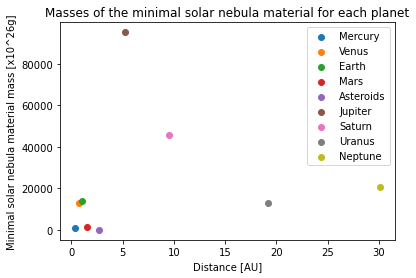

In [48]:
for i in range(len(min_masses)):
    plt.scatter(distances[i], min_masses[i], label = planets[i])
plt.legend()
plt.xlabel('Distance [AU]')
plt.ylabel('Minimal solar nebula material mass [x10^26g]')
plt.title('Masses of the minimal solar nebula material for each planet')

In [17]:
surface_density = [masses[x]/(2*np.pi*distances[x]**2) for x in range(len(distances))]

Text(0.5, 1.0, 'Surface density of solar nebula material for each planet')

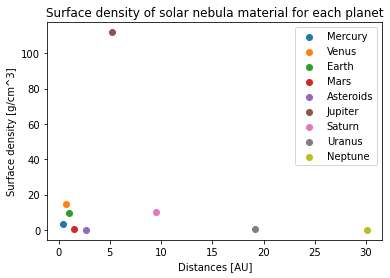

In [47]:
for i in range(len(min_masses)):
    plt.scatter(distances[i], surface_density[i], label = planets[i])
plt.legend()
plt.xlabel('Distances [AU]')
plt.ylabel('Surface density [g/cm^3]')
plt.title('Surface density of solar nebula material for each planet')

In [22]:
def func(x, a, b): #surface density function given in the exercise 
    return a*(x**(-b))

In [23]:
popt, pcov = curve_fit(func, distances, surface_density)

In [33]:
y_dat = [func(x, popt[0], popt[1]) for x in distances]

Text(0, 0.5, 'Surface density [g/cm^3]')

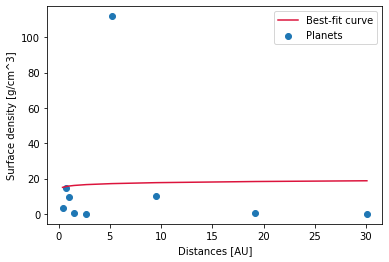

In [39]:
plt.plot(distances, y_dat, color='crimson')
plt.scatter(distances, surface_density)
plt.legend(['Best-fit curve', 'Planets'])
plt.xlabel('Distances [AU]')
plt.ylabel('Surface density [g/cm^3]')
plt.title('Surface density best-fit values for a given function')

In [52]:
from scipy.integrate import dblquad

In [57]:
def f(r, theta):
    return popt[0]*(r**(-popt[1]))

In [58]:
dblquad(f, 0, 2*np.pi, distances[0], distances[-1])

(3342.0477613955654, 6.533083268064508e-07)

Mass of solar nebula material required to form the planets, estimated via integration of our already given function is 3342.048, with a negligible error. 